# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.
Our target accuracy is 70%, but any accuracy over 50% is a great start.
Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [11]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [8]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

100%|██████████| 135107811/135107811 [01:12<00:00, 1865987.28it/s]


In [9]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [10]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [105]:
# Define transforms
## YOUR CODE HERE ##
transform_train = transforms.Compose([transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

transform_test = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

# Create training set and define training dataloader

## YOUR CODE HERE ##
train_data = ImageFolder( data_dir+'/train', transform =  transform_train)
train_loader = torch.utils.data.DataLoader(train_data,batch_size = 250 ,shuffle = True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = ImageFolder( data_dir+'/test', transform = transform_test)
test_loader=torch.utils.data.DataLoader(test_data,batch_size = 250 ,shuffle = True)

# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [80]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        std = (.5, .5, .5)
        mean = (.5, .5, .5)
        for i in range(3):
            image[i] = std[i] * image[i] + mean[i]
        plt.imshow(np.rot90(image.T, k=3))
        plt.show()

truck


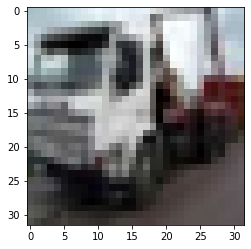

truck


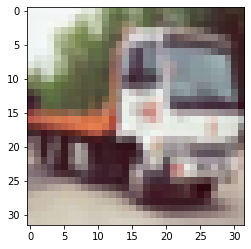

bird


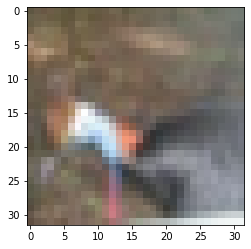

frog


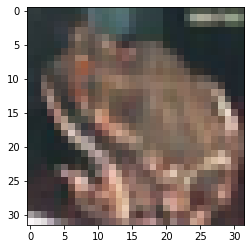

car


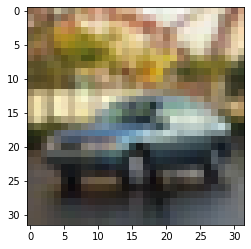

In [81]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

In [82]:
images, labels = next(iter(train_loader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([250, 3, 32, 32])
torch.Size([250])


In [83]:
images, labels = next(iter(test_loader))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([250, 3, 32, 32])
torch.Size([250])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [90]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for param in model.parameters():
    param.requires_grad = False
    
# TODO: Define your network architecture here
'''
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3072, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x


model = Classifier()

model.classifier = nn.Sequential(nn.Linear(3072, 128),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(128, 10),
                                 nn.LogSoftmax(dim=1))
'''
model = nn.Sequential(nn.Linear(3072, 256),
                      nn.ReLU(),
                      nn.Linear(256, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

model.to(device)

Sequential(
  (0): Linear(in_features=3072, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [91]:
## YOUR CODE HERE ##

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.parameters(), lr=0.002)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [92]:
## YOUR CODE HERE ##
epochs = 10
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    loss_values = []

    for images, labels in train_loader:
        # Flatten  images into a 1D long vector
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in test_loader:
                images = images.view(images.shape[0], -1)
                output = model.forward(images)
                test_loss += criterion(output, labels)
                
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()       
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))

Epoch: 1/10..  Training Loss: 1.660..  Test Loss: 1.502..  Test Accuracy: 0.469
Epoch: 2/10..  Training Loss: 1.466..  Test Loss: 1.435..  Test Accuracy: 0.493
Epoch: 3/10..  Training Loss: 1.383..  Test Loss: 1.387..  Test Accuracy: 0.515
Epoch: 4/10..  Training Loss: 1.320..  Test Loss: 1.389..  Test Accuracy: 0.512
Epoch: 5/10..  Training Loss: 1.276..  Test Loss: 1.356..  Test Accuracy: 0.524
Epoch: 6/10..  Training Loss: 1.238..  Test Loss: 1.352..  Test Accuracy: 0.526
Epoch: 7/10..  Training Loss: 1.200..  Test Loss: 1.331..  Test Accuracy: 0.534
Epoch: 8/10..  Training Loss: 1.171..  Test Loss: 1.317..  Test Accuracy: 0.538
Epoch: 9/10..  Training Loss: 1.139..  Test Loss: 1.338..  Test Accuracy: 0.540
Epoch: 10/10..  Training Loss: 1.111..  Test Loss: 1.318..  Test Accuracy: 0.545


Plot the training loss (and validation loss/accuracy, if recorded).

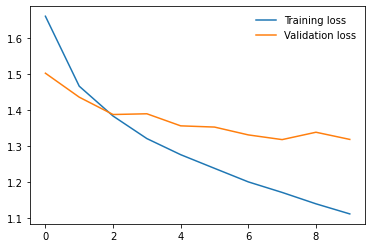

In [93]:
## YOUR CODE HERE ##

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Build and run with transfer learning

In [86]:
from torchvision import models

In [106]:
train_losses, test_losses = [], []
model = models.vgg16(pretrained=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for param in model.parameters():
    param.requires_grad = False

model.classifier = nn.Sequential(nn.Linear(25088, 256),
                             nn.ReLU(),
                             nn.Dropout(0.3),
                             nn.Linear(256, 10),
                             nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device)

epochs = 1
steps = 0
running_loss = 0
print_every = 5

for epoch in range(epochs):
    running_loss = 0
    
    for inputs, labels in train_loader:
        steps += 1

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:
            valid_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in test_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)

                    valid_loss += batch_loss.item()

                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            model.train()
            train_losses.append(running_loss/len(train_loader))
            test_losses.append(valid_loss/len(test_loader))
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {valid_loss/len(test_loader):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_loader):.3f}")            
            
            

Epoch 1/1.. Train loss: 6.745.. Test loss: 3.768.. Test accuracy: 0.427
Epoch 1/1.. Train loss: 9.606.. Test loss: 1.928.. Test accuracy: 0.417
Epoch 1/1.. Train loss: 11.474.. Test loss: 1.677.. Test accuracy: 0.436
Epoch 1/1.. Train loss: 13.151.. Test loss: 1.550.. Test accuracy: 0.479
Epoch 1/1.. Train loss: 14.801.. Test loss: 1.448.. Test accuracy: 0.524
Epoch 1/1.. Train loss: 16.376.. Test loss: 1.366.. Test accuracy: 0.542
Epoch 1/1.. Train loss: 17.788.. Test loss: 1.344.. Test accuracy: 0.542
Epoch 1/1.. Train loss: 19.239.. Test loss: 1.342.. Test accuracy: 0.546
Epoch 1/1.. Train loss: 20.681.. Test loss: 1.304.. Test accuracy: 0.555
Epoch 1/1.. Train loss: 22.098.. Test loss: 1.274.. Test accuracy: 0.567
Epoch 1/1.. Train loss: 23.475.. Test loss: 1.260.. Test accuracy: 0.573
Epoch 1/1.. Train loss: 24.781.. Test loss: 1.256.. Test accuracy: 0.574
Epoch 1/1.. Train loss: 26.128.. Test loss: 1.247.. Test accuracy: 0.575
Epoch 1/1.. Train loss: 27.454.. Test loss: 1.232.. T

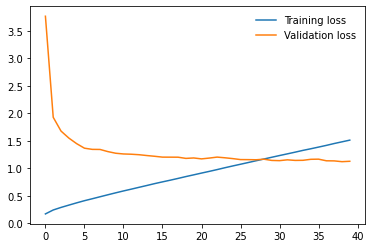

In [107]:
## YOUR CODE HERE ##

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)        

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [109]:
##YOUR CODE HERE##

#In the last cell code, we have 62.0% accuracy

## Saving your model
Using `torch.save`, save your model for future loading.

In [110]:
## YOUR CODE HERE ##
print("Final model: \n\n", model, '\n')

##Save Model  torch.save(model.state_dict(), PATH)
print("Model state dict keys: \n\n", model.state_dict().keys())
torch.save(model.state_dict(), 'checkpoint.pth')

Final model: 

 VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, paddi

## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.

As we can see on the previous steps we have 2 scenarios. The first one is a neural network trained by me who have 54.5% of accuracy, according to the requirements is a decent perfomance but not enough, the second scenario is using Transfer Learning wich accuracy increase to 62%. In the last 2 scenarios we didnt reach the goal of have 70% or more in accuracy. 

For this reason the recomendation is buy Detectocorp model for a short-term because with more time and study im sure that as data scienctist i can exceed the accuracy goal using more existing architectures or preloaded models from torchvision.